## Introduction

The carry trade, often described as "picking up pennies in front of a steamroller," is a strategy that involves borrowing in a low-interest-rate currency and investing in a high-interest-rate currency to capture the interest rate differential. While this approach can yield consistent small profits, it is fraught with significant risk, particularly in volatile market conditions. The strategy's effectiveness is undermined by high volatility, which can lead to sharp and unexpected currency movements, eroding or negating the gains from interest rate differentials.

The success of the carry trade is contingent upon the failure of Uncovered Interest Parity (UIP), which is typically characterized by the following relationship:

$$
E\left(\frac{S_{t+1}}{S_t}\right) = \frac{1 + i_d}{1 + i_f}
$$

where:
- $E\left(\frac{S_{t+1}}{S_t}\right)$ is the expected future spot exchange rate relative to the current spot exchange rate,
- $i_d$ represents the domestic interest rate, and
- $i_f$ denotes the foreign interest rate.

According to UIP, the difference in interest rates between two countries should equal the expected change in exchange rates between their currencies, otherwise, there exists an arbitrage opportunity. However, in practice, exchange rates do not always adjust to offset the interest rate differential, a phenomenon often attributed to an inherent currency risk overlooked by the UIP theory. This failure of UIP enables traders to profit from the carry trade.

In an effort to manage the risks associated with high volatility and to enhance the efficacy of the carry trade, this project focuses on modeling the volatility of G10 currency to USD spot rates. Building on the seminal work of Meese and Rogoff (1983) and incorporating Citibank’s "on-off switch" trade strategy, the goal of this project is to develop a robust GARCH-based volatility forecasting risk indicator, thereby reducing the risk of being metaphorically "steamrolled."

### Key Background

Meese and Rogoff (1983) found that a simple random walk model, which predicts no change between the spot price at time $T$ and $T+1$, outperformed all time series models for forecasting foreign exchange rate levels at 1, 6, and 12-month horizons. Although Meese and Rogoff were modeling non-stationary level rates, their findings have been revisited and examined in the context of more recent data and methodologies. The primary conclusion—that a simple random walk model often outperforms more complex structural and time series models in out-of-sample exchange rate forecasting—remains a significant reference point in exchange rate modeling.

Subsequent research has shown that while some models can improve in-sample predictability using various fundamental factors, the random walk model continues to be a strong benchmark due to the inherent challenges and instabilities in exchange rate prediction. Studies suggest that structural changes and parameter instability in exchange rates contribute to the difficulty of surpassing the random walk model's performance in out-of-sample forecasts. Recent advancements have explored micro-based approaches and the inclusion of high-frequency data, which have shown some promise in specific contexts but still have not consistently outperformed the random walk model across broader horizons and varying conditions (Molodtsova & Papell, 2014; Moosa & Burns, 2015).

### Portfolio Strategies and Forecasting Methodology

#### Pairwise Carry Trade Portfolio

The pairwise carry trade strategy involves taking long positions in high-interest-rate currencies and short positions in low-interest-rate currencies to exploit the interest rate differential between two currencies. This strategy assumes that currencies with higher interest rates will either appreciate or remain stable relative to currencies with lower interest rates. In a basket of currencies, this approach would involve selecting the single lowest and highest interest rate countries.

#### HML Carry Trade Portfolio

The HML (High Minus Low) carry trade strategy involves taking long positions in several of the highest-yielding currencies and short positions in several of the lowest-yielding currencies. The primary aim is to reduce the idiosyncratic risk associated with investing in single currencies, thereby ideally increasing the portfolio's Sharpe ratio. The HML portfolio allows for some discretion in balancing risk reduction with return potential. For this project, HML weighting will be distributed as 70% - 20% - 10% for the first, second, and third leading currencies in both the long and short baskets. This allocation is intended to maintain a strong speculative position in the leading currencies while hedging against idiosyncratic black swan events with 30% of the allocation spread across other currencies.

#### Citibank’s "On-Off Switch" Trade Strategy

The Citibank "on-off switch" strategy for the carry trade involves dynamically adjusting exposure to carry trades based on market conditions, particularly focusing on periods of low and high volatility. The strategy involves turning "on" carry trade positions during periods of low volatility and turning them "off" during periods of high volatility. The decision to switch on or off is based on indicators that predict market volatility and risk. In this project, the strategy will be extended to function around a GARCH-based volatility indicator.

#### GARCH Models

The Generalized Autoregressive Conditional Heteroskedasticity (GARCH) family of models is used to estimate and forecast the volatility of time series data. The GARCH model assumes that the variance of the error terms (i.e., the volatility) changes over time and is dependent on past errors and past variances, typically denoted as GARCH($p$,$q$), where $p$ represents the number of lagged variances and $q$ represents the number of lagged squared residuals used in the model.

The variance equation for the GARCH($p$, $q$) model is given by:

$$
\sigma_t^2 = \alpha_0 + \sum_{i=1}^{q} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{p} \beta_j \sigma_{t-j}^2
$$

where:
- $\sigma_t^2$ is the conditional variance at time $t$,
- $\epsilon_t$ represents the residuals,
- $\alpha_0$ is a constant,
- $\alpha_i$ are the coefficients for the lagged squared residuals, and
- $\beta_j$ are the coefficients for the lagged variances.

The mean equation often specified with the GARCH model is:

$$
y_t = \mu + \sum_{k=1}^{m} \phi_k y_{t-k} + \sum_{l=1}^{n} \theta_l \epsilon_{t-l} + \epsilon_t
$$

where:
- $y_t$ represents the time series data,
- $\mu$ is the mean,
- $\phi_k$ are the coefficients of the autoregressive terms,
- $\theta_l$ are the coefficients of the moving average terms, and
- $\epsilon_t$ is the error term.

The unique aspect of the GARCH model lies in its ARCH component, which allows past variances to influence current variance estimates. This is consistent with the correlation observed by Meese and Rogoff in foreign exchange rates.


# Notebook Structure

1. **Establishing Portfolio Returns and Importing Dataset**
   - 1.1 Dataset Construction (Excel)
   - 1.2 Importing the Dataset to Python

2. **GARCH Model Estimation and Testing (EViews)**
   - 2.1 Testing Portfolios and Variables
   - 2.2 GARCH Modeling & Candidate Selection (Diebold-Mariano Test)
   - 2.3 Meese-Rogoff Comparison

3. **Constructing and Implementing the Volatility Indicator**
   - 3.1 Indicator Implementation
   - 3.2 Setting Benchmarks
   - 3.3 Realized Volatility
   - 3.4 Create Indicator
   - 3.5 Recreating Portfolios Under Indicator

4. **Final Analysis and Conclusion**

# 1.1 Dataset Construction

## Data
The dataset utilized in this project comprises G10 currency spot rates against the USD and corresponding 1-month forward premiums. The data is sampled on a monthly frequency to align with the duration of the forward contracts and the 1-month risk-free rates for each currency. All data has been sourced from the Bloomberg Terminal.

## Carry Trade Returns
The returns from the carry trade are proxied by the forward returns, calculated as the difference between the logarithm of the spot rate one period ahead and the logarithm of the forward rate at the current time period:

$$
\ln(S_{t+1}) - \ln(F_t)
$$

This approach assumes that the forward contract price reflects the addition of the local interest rate, commonly referred to as the forward premium. By comparing the future spot rate with the forward rate that matures simultaneously, we can quantify the actual net interest premium realized in each period.

## Portfolio Construction
The initial step in constructing the portfolios involves calculating the forward premia for all currencies. The forward premium serves as a proxy for each country’s interest rate; hence, the carry trade strategy entails borrowing in the currency with the lowest forward rate and investing in the currency with the highest forward rate. The forward premium at each month is computed as:

$$
\ln\left(\frac{F_t}{S_t}\right)
$$

Subsequently, the currencies are ranked according to their forward premia, where a rank of 1 corresponds to the currency with the lowest premium, and a rank of 10 to the highest. Based on these rankings, portfolio weights are assigned. The portfolio returns are then derived by taking the cross product of the carry trade returns and the assigned weights.

- **Pairwise Portfolio Weightings:** -1 for the currency with the lowest premium, +1 for the currency with the highest premium.
- **HML Portfolio Weightings:** -0.7, -0.2, -0.1 for the 1st, 2nd, and 3rd lowest premia, respectively, and +0.7, +0.2, +0.1 for the 1st, 2nd, and 3rd highest premia, respectively.

## Import into Python

The resulting portfolio returns are imported into Python from a worksheet labeled "ImportData" for further analysis.

For a detailed explanation of the data construction process, please refer to the `FX_data.xlsx` dataset.

          Date  Pairwise Returns  HML Returns
0   1998-12-31          0.048757     0.019444
1   1999-01-29         -0.023709    -0.013124
2   1999-02-26          0.028782     0.026814
3   1999-03-31          0.006614     0.016433
4   1999-04-30          0.011302     0.008458
..         ...               ...          ...
230 2018-02-28          0.015234     0.007220
231 2018-03-30          0.012130     0.011717
232 2018-04-30         -0.008371     0.001779
233 2018-05-31         -0.020696    -0.018102
234 2018-06-28          0.000000     0.000000

[235 rows x 3 columns]


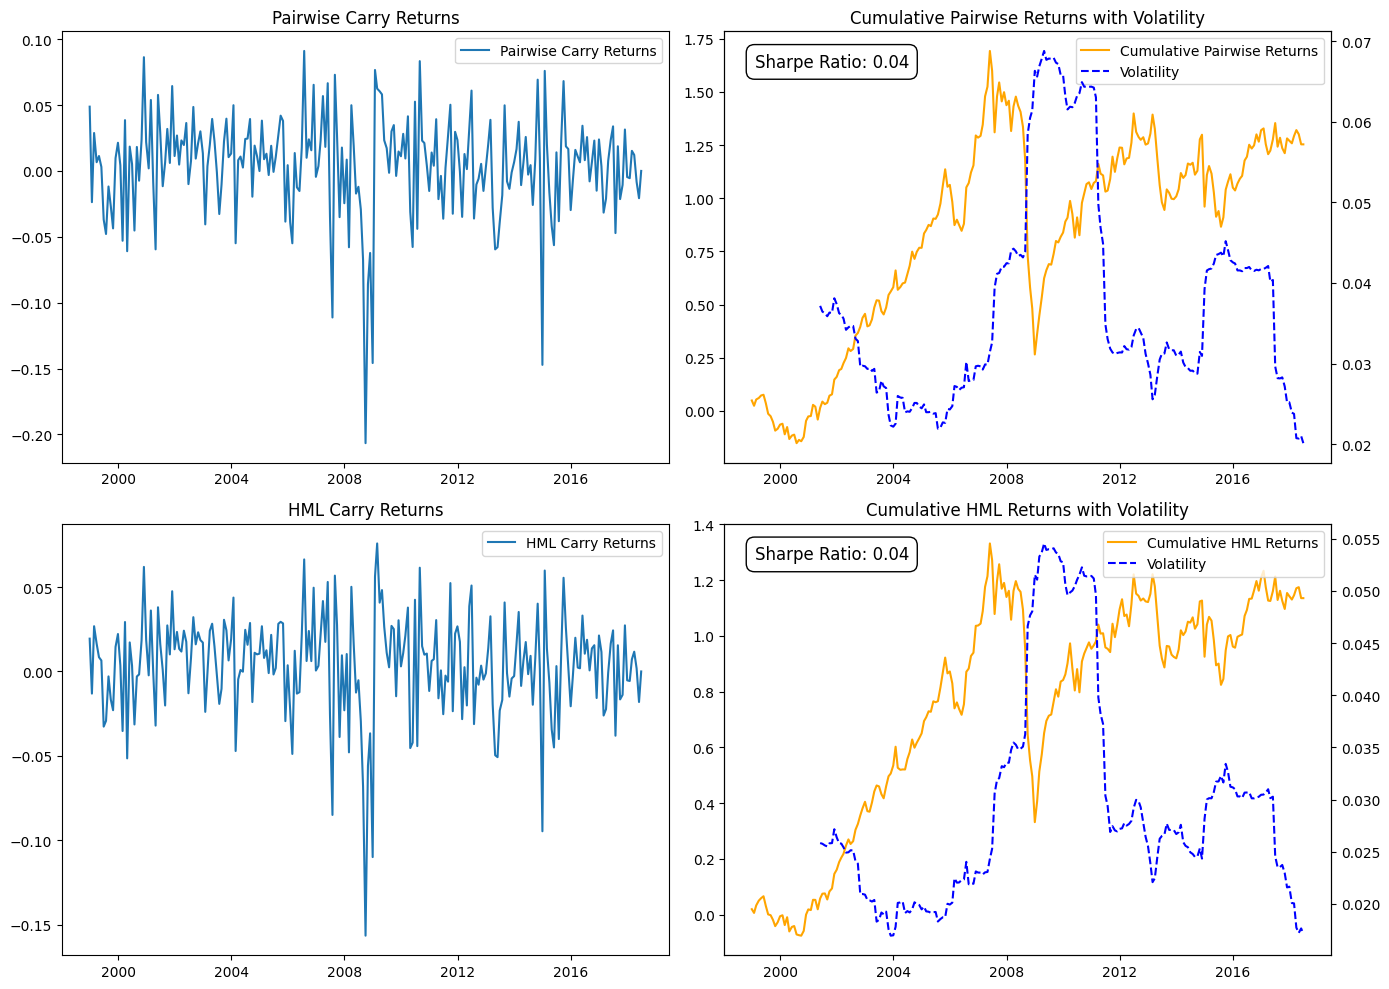

In [1026]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file and read the 'ImportData' sheet
file_path = 'FX_data.xlsx'
df = pd.read_excel(file_path, sheet_name='ImportData')

# Display the contents of the DataFrame
print(df)

# Extract the necessary columns
dates = pd.to_datetime(df['Date'])
pairwise_carry_returns = df['Pairwise Returns']
hml_carry_returns = df['HML Returns']

# Calculate cumulative returns
cumulative_pairwise_returns = (1 + pairwise_carry_returns).cumprod() - 1
cumulative_hml_returns = (1 + hml_carry_returns).cumprod() - 1

# Calculate rolling volatility (standard deviation) with a window of 30 periods
rolling_window = 30
pairwise_volatility = pairwise_carry_returns.rolling(window=rolling_window).std()
hml_volatility = hml_carry_returns.rolling(window=rolling_window).std()

# Calculate Sharpe ratio
risk_free_rate = 0.0025  # Assuming risk-free rate is - a rough historical average of the US T-bill (monthly)
pairwise_sharpe_ratio = (pairwise_carry_returns.mean() - risk_free_rate) / pairwise_carry_returns.std()
hml_sharpe_ratio = (hml_carry_returns.mean() - risk_free_rate) / hml_carry_returns.std()

# Plot the data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot Pairwise Carry Returns
axes[0, 0].plot(dates, pairwise_carry_returns, label='Pairwise Carry Returns')
axes[0, 0].set_title('Pairwise Carry Returns')
axes[0, 0].legend()

# Plot Cumulative Pairwise Returns with volatility
ax1 = axes[0, 1]
line1, = ax1.plot(dates, cumulative_pairwise_returns, label='Cumulative Pairwise Returns', color='orange')
ax1.set_title('Cumulative Pairwise Returns with Volatility')
ax2 = ax1.twinx()
line2, = ax2.plot(dates, pairwise_volatility, label='Volatility', color='blue', linestyle='dashed')

# Combine legends
lines = [line1, line2]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper right')

ax1.annotate(f'Sharpe Ratio: {pairwise_sharpe_ratio:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

# Plot HML Carry Returns
axes[1, 0].plot(dates, hml_carry_returns, label='HML Carry Returns')
axes[1, 0].set_title('HML Carry Returns')
axes[1, 0].legend()

# Plot Cumulative HML Returns with volatility
ax3 = axes[1, 1]
line3, = ax3.plot(dates, cumulative_hml_returns, label='Cumulative HML Returns', color='orange')
ax3.set_title('Cumulative HML Returns with Volatility')
ax4 = ax3.twinx()
line4, = ax4.plot(dates, hml_volatility, label='Volatility', color='blue', linestyle='dashed')

# Combine legends
lines = [line3, line4]
ax3.legend(lines, [line.get_label() for line in lines], loc='upper right')

ax3.annotate(f'Sharpe Ratio: {hml_sharpe_ratio:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', 
             fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

plt.tight_layout()
plt.show()

From portfolio construction it is clear that volatility spikes cause sharp negative returns in the carry trade. The goal of the GARCH indicator will be to not trade during these times, and ideally increase returns and Sharpe ratio.

As for pairwise vs HML, there is no clear benefit in idiosyncratic risk reduction reflected in the Sharpe ratio for this dataset. However, it is still possible that the HML portfolio might have enhanced risk features under a GARCH indicator, so testing will still be done.

# 2.1 Testing Portfolios and Variables

Before estimating GARCH models, it is crucial to ensure that the return data and potential explanatory variables are suitable for analysis through several econometric tests. All preliminary testing was conducted in EViews, and the results are summarized below.

## Testing Summary

### ADF Fisher Unit Root Test on All Spot Rates

| Method                  | Statistic | Prob.  |
|-------------------------|-----------|--------|
| ADF - Fisher Chi-square  | 1154.33   | 0.0000 |
| ADF - Choi Z-stat        | -32.9934  | 0.0000 |

| Series  | Prob.  | Lag | Max Lag | Obs  |
|---------|--------|-----|---------|------|
| AUD_D   | 0.0000 | 0   | 14      | 233  |
| CAD_D   | 0.0000 | 0   | 14      | 233  |
| CHF_D   | 0.0000 | 0   | 14      | 233  |
| DKK_D   | 0.0000 | 0   | 14      | 233  |
| EUR_D   | 0.0000 | 0   | 14      | 233  |
| GBP_D   | 0.0000 | 0   | 14      | 233  |
| JPY_D   | 0.0000 | 0   | 14      | 233  |
| NOK_D   | 0.0000 | 0   | 14      | 233  |
| NZD_D   | 0.0000 | 0   | 14      | 233  |
| SEK_D   | 0.0000 | 0   | 14      | 233  |

### ADF Fisher Unit Root Test on Pairwise and HML Returns

| Method                  | Statistic | Prob.  |
|-------------------------|-----------|--------|
| ADF - Fisher Chi-square  | 209.259   | 0.0000 |
| ADF - Choi Z-stat        | -14.0131  | 0.0000 |

| Series           | Prob.  | Lag | Max Lag | Obs  |
|------------------|--------|-----|---------|------|
| PAIRWISE_RETURNS | 0.0000 | 0   | 14      | 234  |
| HML_RETURNS      | 0.0000 | 0   | 14      | 234  |

#### Structural Breaks (Quandt-Andrews Unknown Breakpoint Test)

**Null Hypothesis:** No breakpoints within 15% trimmed data

| Statistic                          | Pairwise Portfolio   | HML Portfolio        | Prob.  |
|------------------------------------|----------------------|----------------------|--------|
| Maximum LR F-statistic (2007M06)   | 4.493342             | 4.881014             | 0.3059 |
| Maximum Wald F-statistic (2007M06) | 4.493342             | 4.881014             | 0.3059 |
| Exp LR F-statistic                 | 0.629999             | 0.746306             | 0.3518 |
| Exp Wald F-statistic               | 0.629999             | 0.746306             | 0.3518 |
| Ave LR F-statistic                 | 0.982422             | 1.180663             | 0.3493 |
| Ave Wald F-statistic               | 0.982422             | 1.180663             | 0.3493 |

**Note:** Probabilities are calculated using Hansen's (1997) method.

### Tests on Volatility Behavior of Returns, Using a GARCH (1,1)

#### ARCH-LM Test (Testing for Volatility Clustering, i.e., ARCH Effect)

**Null Hypothesis:** No ARCH effect (Heteroskedasticity Test: ARCH)

**Pairwise Returns:**

| Statistic       | Value     | Prob.                |
|-----------------|-----------|---------------------|
| **F-statistic**     | **0.338743**  | **Prob. F(12,210):** 0.9811  |
| **Obs*R-squared**   | **4.234586**  | **Prob. Chi-Sq(12):** 0.9788  |

**HML Returns:**

| Statistic       | Value     | Prob.                |
|-----------------|-----------|---------------------|
| **F-statistic**     | **0.361978**  | **Prob. F(12,210):** 0.9751  |
| **Obs*R-squared**   | **4.519155**  | **Prob. Chi-Square(12):** 0.9721  |

#### Engle-Ng Sign-Bias Test (For Asymmetry, i.e., Leverage Effect)

**Null Hypothesis:** No leverage effects in standardized residuals

**Pairwise Returns:**

| Test            | t-Statistic | Prob.  |
|-----------------|-------------|--------|
| Sign-Bias       | -1.981703   | 0.0487 |
| Negative-Bias   | -1.368231   | 0.1726 |
| Positive-Bias   | -2.346047   | 0.0198 |
| Joint-Bias      | 7.379641    | 0.0635 |

**HML Returns:**

| Test            | t-Statistic | Prob.  |
|-----------------|-------------|--------|
| Sign-Bias       | -1.737238   | 0.0837 |
| Negative-Bias   | -1.528142   | 0.1279 |
| Positive-Bias   | -2.097327   | 0.0371 |
| Joint-Bias      | 6.816737    | 0.0809 |


## Takeaways:
- There are no unit roots in any of the returns or spot rates.
- No significant breakpoints were found in the data.
- The high p-values in the ARCH-LM test suggest the presence of an ARCH effect, indicating that a GARCH model may be an appropriate specification.
- The Sign-Bias test results, close to the 5% significance level, suggest some presence of leverage effects. Therefore, a TARCH model will also be considered for further analysis.



# 2.2 GARCH Modeling & Candidate Selection (Diebold-Mariano Test)

## Proxy for Conditional Variance (Volatility)
To estimate volatility (conditional variance), this study employs the squared residuals derived from an AR(1) model for each time series. The AR(1) model, devoid of explanatory variables, effectively captures the unexpected changes or shocks in the data, which are not explained by the model. This procedure is designed to filter out potential autocorrelation and provide a robust volatility benchmark for each time series without exogenous influence. The squared residuals from this model will serve as a proxy for volatility, applied to both return time series and spot rates, the latter of which will be tested as exogenous variables in subsequent models.

## Variable Testing
To identify the optimal combinations of spot rates for inclusion in the models, either as endogenous or exogenous variables, a stepwise elimination process will be employed. This method involves sequentially removing the least significant variables until only those with significance levels below 5% remain. If, in later models, a variable conflicts with a volatility effect (e.g., asymmetry, long memory), it will be excluded in favor of the volatility effect. Initial variable testing will be conducted on a GARCH(1,1) model. The results and corresponding statistics are presented below.

## GARCH Components
To capture the effect of different GARCH components, the study evaluates several models, including GARCH-M, TARCH, EGARCH, FIGARCH, and FIEGARCH. The performance of these models will be compared using the Diebold-Mariano test.

## Diebold-Mariano Test
The null hypothesis of the Diebold-Mariano test posits that any two models have equal predictive accuracy, as determined by the differences in their loss functions. If more than two models are tested, the loss functions are plotted for comparative analysis. In this project, all GARCH family models will be evaluated, with the top performer being compared against the random walk model.

The sample periods for the test are:
- **Training Sample:** December 1998 (1998M12) to December 2016 (2016M12) - 217 observations
- **Evaluation Sample:** January 2017 (2017M01) to June 2018 (2018M06) - 18 observations

### Results:
#### Pairwise Returns Winner: TARCH
The TARCH model exhibited the lowest loss functions among all candidates, suggesting that G10 currency volatility behaves asymmetrically.

| Evaluation Statistics | Value            |
|-----------------------|------------------|
| Sample                | 2017M01-2018M06  |
| Included observations | 18               |
| Evaluation sample     | 2017M01-2018M06  |
| Training sample       | 1999M01-2016M12  |
| Number of forecasts   | 12               |

**Evaluation Statistics (Loss Functions):**

| Forecast           | RMSE       | MAE        | MAPE       | SMAPE     | Theil U1 | Theil U2 |
|--------------------|------------|------------|------------|-----------|----------|----------|
| PAIRWISE_VARIABLES | 0.000739   | 0.000463   | 763.3262   | 113.5653  | 0.656719 | 0.928031 |
| PAIRWISE_TARCH     | 0.000717   | 0.000426   | 2227.738   | 95.46895  | 0.575450 | 0.713057 |
| PAIRWISE_EGARCH    | 0.000871   | 0.000513   | 100.0000   | 200.0000  | 1.000000 | 1.009757 |
| PAIRWISE_GARCHM    | 4.26E+12   | 1.11E+12   | 8.99E+19   | 192.8234  | 1.000000 | 2.83E+14 |
| PAIRWISE_FIGARCH   | 0.000871   | 0.000871   | 1.80E+19   | 189.4624  | 1.000000 | 5.66E+13 |
| Simple mean        | 8.52E+11   | 2.23E+11   | 630.4316   | 113.8653  | 0.727705 | 0.928003 |
| Simple median      | 0.000771   | 0.000457   | 774.7412   | 107.9564  | 0.763575 | 0.911070 |
| Least-squares      | NA         | NA         | NA         | NA        | NA       | NA       |
| Mean square error  | 0.000871   | 0.000441   | 5.99E+18   | 194.9474  | 0.983852 | 0.888472 |
| MSE ranks          | 2.84E+11   | 7.43E+10   | 186.2889   | 189.4624  | 0.954984 | 5.22E+13 |
| Smooth AIC weights | 0.021567   | 0.017808   | 186.2519   | 186.2889  | 0.954858 | 0.900741 |
| SIC weights        | 7.82E+11   | 2.04E+11   | 1.65E+19   | 189.7257  | 1.000000 | 5.19E+13 |

#### HML Returns Models: TARCH
For the HML portfolio, the TARCH model was closely followed by a GARCH(1,1) model with the Norwegian Krona included as an explanatory variable in the mean equation. However, given the TARCH model's superior performance with the pairwise portfolio, it will be adopted as the standard model for this project.

| Evaluation Statistics | Value            |
|-----------------------|------------------|
| Sample                | 2017M01-2018M06  |
| Included observations | 18               |
| Evaluation sample     | 2017M01-2018M06  |
| Training sample       | 1999M01-2016M12  |
| Number of forecasts   | 12               |

**Evaluation Statistics (Loss Functions):**

| Forecast           | RMSE       | MAE        | MAPE       | SMAPE     | Theil U1 | Theil U2 |
|--------------------|------------|------------|------------|-----------|----------|----------|
| HML_VARIABLES      | 0.000461   | 0.000312   | 5212.841   | 104.5840  | 0.524877 | 0.357470 |
| HML_TARCH          | 0.000460   | 0.000312   | 5338.229   | 104.3334  | 0.521201 | 0.385027 |
| HML_TARCH          | 0.000482   | 0.000307   | 6136.276   | 102.4253  | 0.559712 | 0.489744 |
| HML_EGARCH         | 0.000484   | 0.000306   | 5982.341   | 102.6696  | 0.565624 | 0.454294 |
| HML_FIGARCH        | 0.000487   | 0.000348   | 9998.424   | 101.1513  | 0.466250 | 1.400237 |
| Simple mean        | 0.000460   | 0.000312   | 6532.219   | 102.0232  | 0.519971 | 0.617302 |
| Simple median      | 0.000459   | 0.000312   | 6018.347   | 103.4250  | 0.517455 | 0.454309 |
| Least-squares      | NA         | NA         | NA         | NA        | NA       | NA       |
| Mean square error  | 0.000467   | 0.000312   | 6546.215   | 101.9955  | 0.519297 | 0.617300 |
| MSE ranks          | 0.000464   | 0.000312   | 7013.595   | 101.0726  | 0.502300 | 0.732049 |
| Smooth AIC weights | 0.000461   | 0.000312   | 9379.571   | 100.9555  | 0.472132 | 1.259778 |
| SIC weights        | 0.000475   | 0.000347   | 9378.458   | 100.9551  | 0.472138 | 1.259033 |


# 2.4 Meese-Rogoff Comparison

In the next step, the top-performing models from the GARCH family are compared to the Meese and Rogoff random walk model. The random walk model is constructed by regressing the portfolio residuals on their lagged values, effectively capturing the characteristic of no change from the residual at time $( t )$ to $( t+1 )$.

## Results

### Pairwise Portfolio

| Evaluation Statistics | Value            |
|-----------------------|------------------|
| Sample                | 2017M01-2018M06  |
| Included observations | 18               |
| Evaluation sample     | 2017M01-2018M06  |
| Training sample       | 1999M01-2016M12  |
| Number of forecasts   | 9                |

**Combination Tests**
*Null Hypothesis: Forecast $( i )$ includes all information contained in others*

| Equation         | F-stat   | F-prob |
|------------------|----------|--------|
| PAIRWISE_TARCH   | 0.169582 | 0.6859 |
| PAIRWISE_RW      | 0.354122 | 0.5601 |

**Diebold-Mariano Test (HLN Adjusted)**
*Null Hypothesis: Both forecasts have the same accuracy*

| Accuracy  | Statistic | <> prob | > prob | < prob |
|-----------|-----------|---------|--------|--------|
| Abs Error | -1.280744 | 0.2175  | 0.1087 | 0.8913 |
| Sq Error  | -1.885134 | 0.0766  | 0.0383 | 0.9617 |

**Evaluation Statistics**

| Forecast            | RMSE      | MAE       | MAPE      | SMAPE     | Theil U1 | Theil U2 |
|---------------------|-----------|-----------|-----------|-----------|----------|----------|
| PAIRWISE_TARCH      | 0.000717  | 0.000426  | 2227.738  | 95.46895  | 0.575450 | 0.713057 |
| PAIRWISE_RW         | 0.000861  | 0.000516  | 162.0177  | 195.7223  | 0.959365 | 0.975920 |
| Simple mean         | 0.000775  | 0.000427  | 1150.552  | 100.1088  | 0.727781 | 0.844456 |
| Simple median       | 0.000775  | 0.000427  | 1150.552  | 100.1088  | 0.727781 | 0.844456 |
| Least-squares       | NA        | NA        | NA        | NA        | NA       | NA       |
| Mean square error   | 0.000772  | 0.000427  | 1184.278  | 100.1407  | 0.721696 | 0.840275 |
| MSE ranks           | 0.000767  | 0.000426  | 1059.433  | 99.46558  | 0.667705 | 0.800159 |
| Smooth AIC weights  | 0.000751  | 0.000424  | 1150.108  | 99.93653  | 0.735431 | 0.849626 |
| SIC weights         | 0.000777  | 0.000428  | 1113.046  | 100.3152  | 0.734710 | 0.849143 |

### HML Portfolio

| Evaluation Statistics | Value            |
|-----------------------|------------------|
| Sample                | 2017M01-2018M06  |
| Included observations | 18               |
| Evaluation sample     | 2017M01-2018M06  |
| Training sample       | 1999M01-2016M12  |
| Number of forecasts   | 9                |

**Combination Tests**
*Null Hypothesis: Forecast $( i )$ includes all information contained in others*

| Equation         | F-stat   | F-prob |
|------------------|----------|--------|
| HML_TARCH        | 0.239723 | 0.6311 |
| HML_RW           | 2.164685 | 0.1606 |

**Diebold-Mariano Test (HLN Adjusted)**
*Null Hypothesis: Both forecasts have the same accuracy*

| Accuracy  | Statistic | <> prob | > prob | < prob |
|-----------|-----------|---------|--------|--------|
| Abs Error | -0.808641 | 0.4299  | 0.2149 | 0.7851 |
| Sq Error  | -1.527121 | 0.1451  | 0.0726 | 0.9274 |

**Evaluation Statistics**

| Forecast            | RMSE      | MAE       | MAPE      | SMAPE     | Theil U1 | Theil U2 |
|---------------------|-----------|-----------|-----------|-----------|----------|----------|
| HML_TARCH           | 0.000460  | 0.000312  | 5338.229  | 104.3334  | 0.521201 | 0.385027 |
| HML_RW              | 0.000591  | 0.000359  | 125.3063  | 190.3499  | 0.946332 | 0.999631 |
| Simple mean         | 0.000511  | 0.000317  | 2697.039  | 118.3708  | 0.686682 | 0.337384 |
| Simple median       | 0.000511  | 0.000315  | 2697.039  | 118.3708  | 0.686682 | 0.337384 |
| Least-squares       | NA        | NA        | NA        | NA        | NA       | NA       |
| Mean square error   | 0.000507  | 0.000313  | 2850.403  | 116.7113  | 0.674183 | 0.369367 |
| MSE ranks           | 0.000504  | 0.000312  | 3573.688  | 109.9935  | 0.620395 | 0.151971 |
| Smooth AIC weights  | 0.000503  | 0.000311  | 2572.145  | 109.0534  | 0.698853 | 0.374216 |
| SIC weights         | 0.000514  | 0.000316  | 2571.491  | 119.7374  | 0.697207 | 0.367712 |

The results indicate that the models outperformed the random walk model. With this confirmation, the next step is to develop an indicator based on these models for each portfolio.


# 3.1 Indicator Implementation

With the GARCH models established and validated against the Meese-Rogoff random walk model, we now proceed to the implementation of the pairwise and HML indicators for the respective portfolios. These indicators are designed to forecast volatility and accordingly determine whether the carry trade should be activated or deactivated based on whether a predefined volatility threshold is anticipated to be breached.

### Volatility Hedging Mechanism

The volatility hedging strategy embedded in these indicators operates on two distinct levels, providing a robust mechanism for risk management:

1. **Forecasted Volatility:** The primary level of hedging relies on the volatility forecasts generated by the TARCH models. These models capture the asymmetry in volatility behavior and provide predictions that guide the decision to turn the carry trade on or off. If the forecasted volatility exceeds the established threshold, the carry trade will be deactivated to avoid potential losses associated with increased market turbulence.

2. **Realized Volatility as a Failsafe:** Recognizing that model forecasts may not always accurately predict future market conditions, a secondary precautionary measure is incorporated. This measure monitors realized volatility in real-time. If realized volatility breaches the threshold—irrespective of the forecast—the carry trade will be immediately deactivated. This additional layer of protection serves to mitigate risks stemming from unanticipated market shocks or inaccuracies in the model’s forecasts.

### Implementation Strategy

The implementation of these indicators involves integrating the TARCH model's forecasts with real-time data processing to continuously assess both forecasted and realized volatility. The system will operate as follows:

- **Forecast Assessment:** At each time step, the TARCH model will produce a volatility forecast for the upcoming period. This forecast is compared against the predetermined volatility threshold.

- **Decision Rule:** If the forecasted volatility is below the threshold, the carry trade remains active. However, if the forecast exceeds the threshold, the carry trade is deactivated, and positions are closed to prevent potential losses.

- **Failsafe Activation:** Concurrently, the system monitors realized volatility. Should realized volatility exceed the threshold, regardless of the forecast, the carry trade will be turned off. This ensures that the strategy is responsive to actual market conditions and not solely reliant on model predictions.

The dual-level hedging approach in these indicators provides a comprehensive risk management framework, balancing the predictive power of the TARCH models with real-time market awareness. By implementing these indicators, we aim to optimize the carry trade strategy, enhancing returns while minimizing exposure to adverse volatility spikes. The next steps involve backtesting these indicators on historical data to evaluate their effectiveness in various market conditions.


# 3.2 TARCH 1-Month Rolling Forecasts

The first level will be created based of TARCH volatility forecasts for each next month. Implementation is as follows:

In [1027]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Define the rolling window size (e.g., 60 months)
window_size = 30

# Prepare empty lists to store the forecasted volatilities
pairwise_forecasted_volatility = []
hml_forecasted_volatility = []

# Rolling forecast for Pairwise Carry Returns
for start in range(len(pairwise_carry_returns) - window_size):
    end = start + window_size
    model = arch_model(pairwise_carry_returns[start:end], vol='Garch', p=1, o=1, q=1, dist='Normal')
    model_fit = model.fit(disp='off')
    forecast = model_fit.forecast(horizon=1)
    pairwise_forecasted_volatility.append(np.sqrt(forecast.variance.values[-1][0]))

# Rolling forecast for HML Carry Returns
for start in range(len(hml_carry_returns) - window_size):
    end = start + window_size
    model = arch_model(hml_carry_returns[start:end], vol='Garch', p=1, o=1, q=1, dist='Normal')
    model_fit = model.fit(disp='off')
    forecast = model_fit.forecast(horizon=1)
    hml_forecasted_volatility.append(np.sqrt(forecast.variance.values[-1][0]))

# Convert the lists to pandas Series
pairwise_forecasted_volatility_series = pd.Series(pairwise_forecasted_volatility, index=dates[window_size:])
hml_forecasted_volatility_series = pd.Series(hml_forecasted_volatility, index=dates[window_size:])

# Calculate delta volatility (change in volatility)
pairwise_delta_volatility = pairwise_forecasted_volatility_series.diff().abs()
hml_delta_volatility = hml_forecasted_volatility_series.diff().abs()


# 3.3 Realized Volatility

In addition to the primary reliance on forecasted volatility, the second level of carry trade regulation is governed by realized volatility. This layer serves as a precautionary measure, designed to mitigate risks associated with potential inaccuracies in the volatility forecasts. While the TARCH models provide predictive insights, there are scenarios where volatility spikes may not be adequately anticipated. In such cases, relying solely on forecasts could expose the portfolio to unforeseen risks.

### Rationale for Realized Volatility as a Safeguard

Realized volatility reflects the actual fluctuations observed in the market over a given period. By monitoring this metric in real-time, the strategy can respond to market conditions as they unfold, independent of model predictions. This reactive approach ensures that the carry trade is deactivated whenever market conditions become excessively volatile, regardless of the forecast accuracy.

### Implementation Strategy

The process for incorporating realized volatility into the carry trade strategy involves continuous monitoring of market data to calculate the actual volatility for each period. The specific steps are as follows:

1. **Real-Time Monitoring:** At each time interval, the realized volatility is calculated based on the most recent price data. This calculation provides a real-time measure of market turbulence.

2. **Threshold Comparison:** The calculated realized volatility is then compared against a predetermined threshold, established as a critical level beyond which the carry trade should be deactivated to avoid excessive risk.

3. **Trade Deactivation:** If realized volatility exceeds the threshold, the carry trade is immediately turned off, regardless of the forecasted volatility. This ensures that the strategy remains robust and adaptive to actual market dynamics.

The inclusion of realized volatility as a secondary regulatory mechanism adds a crucial layer of risk management to the carry trade strategy. By integrating this real-time safeguard, the strategy not only anticipates potential market disruptions through forecasting but also reacts swiftly to actual market conditions, thereby minimizing the impact of unexpected volatility spikes. This dual-layer approach enhances the overall resilience of the carry trade strategy, providing a more comprehensive defense against adverse market movements.


In [1028]:

# Ensure numeric conversion and handle any non-numeric values by converting them to NaN
pairwise_carry_returns = pd.to_numeric(df['Pairwise Returns'], errors='coerce').dropna()
hml_carry_returns = pd.to_numeric(df['HML Returns'], errors='coerce').dropna()

# Calculate rolling realized volatility using the existing rolling_window variable
pairwise_realized_volatility = pairwise_carry_returns.rolling(window=rolling_window).std()
hml_realized_volatility = hml_carry_returns.rolling(window=rolling_window).std()

# Calculate delta volatility (change in realized volatility)
pairwise_delta_realized_volatility = pairwise_realized_volatility.diff().abs()
hml_delta_realized_volatility = hml_realized_volatility.diff().abs()

hml_carry_returns = hml_carry_returns.iloc[rolling_window:].copy()  # Align with the rolling calculation
hml_carry_returns['delta_realized_volatility'] = hml_delta_realized_volatility.iloc[rolling_window:]

# Drop any NaN values that might result from rolling calculations
pairwise_carry_returns = pairwise_carry_returns.dropna()
hml_carry_returns = hml_carry_returns.dropna()


# 3.4 Setting Benchmarks

To effectively manage the exposure of the carry trade strategy to volatility, it is essential to establish robust benchmarks. These benchmarks serve as the criteria for determining when the carry trade should be activated or deactivated, thereby safeguarding the strategy from significant losses during periods of heightened market turbulence.

## Methodology

The benchmarks are set using the 90th percentile thresholds for both forecasted delta volatility and delta realized volatility. The selection of the 90th percentile is deliberate, as it represents a critical threshold beyond which market conditions are considered too volatile for the carry trade to remain active.

### Forecasted Delta Volatility

The first benchmark is established for forecasted delta volatility, which is derived from the TARCH model. The delta volatility represents the change in forecasted volatility from one period to the next. By calculating the 90th percentile of this series, we identify a threshold that, when exceeded, indicates an unusually high level of forecasted volatility. This serves as a signal to deactivate the carry trade, thereby preemptively mitigating the risk of significant losses due to predicted market instability.

### Realized Delta Volatility

In parallel, a second benchmark is set for realized delta volatility. This measure captures the actual change in market volatility as observed in real-time data. The 90th percentile threshold for realized delta volatility functions as a failsafe, ensuring that even if the forecasted volatility does not trigger a deactivation of the carry trade, any substantial, unexpected increase in realized volatility will do so. This precautionary measure is crucial in scenarios where the TARCH model’s predictions may not fully capture the extent of market volatility.

### Visualization and Analysis

To provide a clear understanding of these volatility dynamics, histograms of both forecasted and realized delta volatility are plotted. These visualizations not only illustrate the distribution of volatility changes but also highlight the critical thresholds with dashed lines, making it easy to observe how frequently the market approaches these extreme levels.

The careful setting of these benchmarks ensures that the carry trade strategy remains resilient in the face of volatility spikes, effectively balancing the pursuit of returns with the need for prudent risk management. By integrating both forecasted and realized measures of volatility, the strategy is equipped with a comprehensive defense against adverse market movements, thus enhancing its overall robustness.


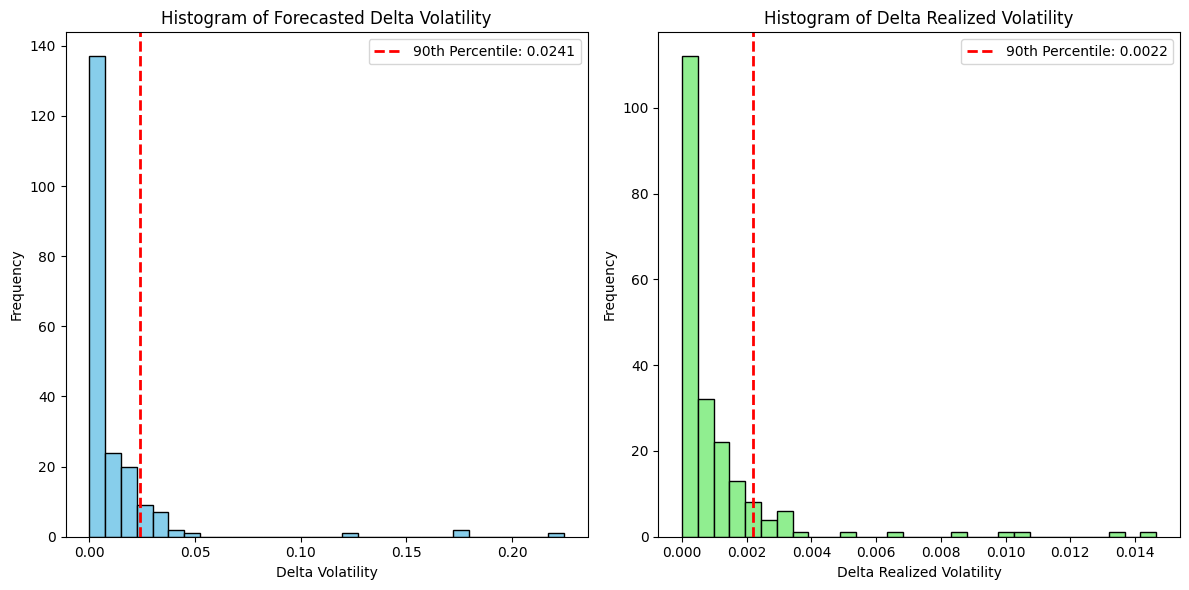

In [1029]:
# Calculate the 90th percentile threshold for forecasted delta volatility
forecasted_delta_volatility_threshold = np.percentile(pairwise_delta_volatility.dropna(), 90)

# Calculate the 90th percentile threshold for delta realized volatility
realized_delta_volatility_threshold = np.percentile(pairwise_delta_realized_volatility.dropna(), 90)

# Plot histogram for forecasted delta volatility
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(pairwise_delta_volatility.dropna(), bins=30, color='skyblue', edgecolor='black')
plt.axvline(forecasted_delta_volatility_threshold, color='red', linestyle='dashed', linewidth=2, label=f'90th Percentile: {forecasted_delta_volatility_threshold:.4f}')
plt.title('Histogram of Forecasted Delta Volatility')
plt.xlabel('Delta Volatility')
plt.ylabel('Frequency')
plt.legend()

# Plot histogram for delta realized volatility
plt.subplot(1, 2, 2)
plt.hist(pairwise_delta_realized_volatility.dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.axvline(realized_delta_volatility_threshold, color='red', linestyle='dashed', linewidth=2, label=f'90th Percentile: {realized_delta_volatility_threshold:.4f}')
plt.title('Histogram of Delta Realized Volatility')
plt.xlabel('Delta Realized Volatility')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


# 3.5 Create Indicator

Having established the benchmarks for forecasted and realized volatility, the next critical step is the implementation of an indicator that governs the activation of the carry trade. This indicator is designed to dynamically adjust the portfolio’s exposure based on the volatility thresholds previously defined, ensuring that the strategy operates under optimal conditions and minimizes exposure during periods of heightened risk.

## Methodology

### Alignment of Volatility Measures with Returns Data

The first task in creating the indicator is to ensure that the volatility measures—both forecasted and realized—are properly aligned with the main returns data. This alignment is essential to ensure that the volatility data corresponds correctly to the respective periods of the carry trade returns. To achieve this, the volatility series are reindexed to match the index of the carry returns series, and any missing data points are filled with zeros. This step is crucial to maintaining the integrity of the time series analysis, preventing any misalignment that could skew the results.

### Application of the Trading Rule

The core of the indicator implementation lies in the application of a trading rule that dictates whether to engage in the carry trade based on the volatility conditions. This rule operates as follows:

1. **Initialization:** A list is initialized to store the returns that have been adjusted by the indicator. This list will ultimately represent the carry trade returns after the application of the volatility-based trading rule.

2. **Looping Through Each Period:** For each time period in the returns series:
   - The indicator checks whether the forecasted delta volatility exceeds the predetermined threshold, or if the realized delta volatility surpasses its corresponding threshold.
   - If either condition is met, the carry trade is deactivated for that period, and the return is set to zero. This reflects a conservative approach where trading is halted during periods of elevated risk.
   - If neither condition is met, the original carry trade return is retained, allowing the trade to proceed under favorable conditions.

3. **Conversion to Time Series:** After processing all periods, the adjusted returns are converted back into a pandas Series, maintaining the original time index. This ensures that the data remains in a format suitable for further analysis and comparison.

### Implementation Across Portfolios

This methodology is applied separately to both the pairwise and HML portfolios. For each portfolio, the volatility measures are aligned with their respective returns data, and the trading rule is applied to generate a series of returns that reflect the implementation of the volatility-based indicator.

- **Pairwise Portfolio:** The indicator adjusts the pairwise carry trade returns, ensuring that trades are only executed when volatility conditions are within the acceptable thresholds.
- **HML Portfolio:** Similarly, the HML portfolio returns are adjusted according to the same volatility thresholds, providing a consistent approach across both portfolios.

The creation of this indicator represents a critical advancement in the management of the carry trade strategy. By incorporating both forecasted and realized volatility into the decision-making process, the indicator allows for a more dynamic and responsive trading strategy. This approach not only optimizes returns under stable market conditions but also safeguards the portfolio against potential losses during periods of elevated risk. The resulting time series of returns, adjusted by the indicator, will serve as the foundation for evaluating the effectiveness of this risk management strategy in subsequent analysis.


In [1030]:
# Ensure the delta volatilities are aligned with the main returns data
pairwise_delta_volatility = pairwise_delta_volatility.reindex(pairwise_carry_returns.index).fillna(0)
pairwise_delta_realized_volatility = pairwise_delta_realized_volatility.reindex(pairwise_carry_returns.index).fillna(0)

# Initialize a list to hold the returns with the indicator applied
pairwise_returns_with_indicator = []

# Loop through each period and apply the trading rule
for i in range(len(pairwise_carry_returns)):
    if pairwise_delta_volatility.iloc[i] > forecasted_delta_volatility_threshold or pairwise_delta_realized_volatility.iloc[i] > realized_delta_volatility_threshold:
        # Do not trade (set return to 0)
        pairwise_returns_with_indicator.append(0)
    else:
        # Trade (keep the original return)
        pairwise_returns_with_indicator.append(pairwise_carry_returns.iloc[i])

# Convert the list back to a pandas Series
pairwise_carry_returns_with_indicator = pd.Series(pairwise_returns_with_indicator, index=pairwise_carry_returns.index)



# Ensure the delta volatilities are aligned with the main returns data
hml_delta_volatility = hml_delta_volatility.reindex(hml_carry_returns.index).fillna(0)
hml_delta_realized_volatility = hml_delta_realized_volatility.reindex(hml_carry_returns.index).fillna(0)

# Initialize a list to hold the returns with the indicator applied
hml_returns_with_indicator = []

# Loop through each period and apply the trading rule for HML portfolio
for i in range(len(hml_carry_returns)):
    if hml_delta_volatility.iloc[i] > forecasted_delta_volatility_threshold or hml_delta_realized_volatility.iloc[i] > realized_delta_volatility_threshold:
        # Do not trade (set return to 0)
        hml_returns_with_indicator.append(0)
    else:
        # Trade (keep the original return)
        hml_returns_with_indicator.append(hml_carry_returns.iloc[i])

# Convert the list back to a pandas Series
hml_carry_returns_with_indicator = pd.Series(hml_returns_with_indicator, index=hml_carry_returns.index)

# 3.5 Recreating Portfolios Under Indicator

In this section, we implement the final step of the strategy by recalculating the portfolio returns under the influence of the volatility-based indicator. The goal is to assess how the indicator impacts the cumulative returns and Sharpe ratios of the Pairwise and HML portfolios, providing a comparative analysis of the strategy's performance with and without the indicator.

## Methodology

### Annualization and Cumulative Returns Calculation

The first step involves calculating the cumulative returns for both the original portfolio and the one adjusted by the indicator. This is done to observe how the indicator affects the overall growth of the portfolio over time. The cumulative returns are computed using the following approach:

- **Cumulative Returns:** Both the original and indicator-adjusted returns are compounded over time to generate cumulative returns. This provides a clear visualization of the portfolio's growth trajectory under both scenarios.
- **Date Alignment:** The dates corresponding to the cumulative returns are aligned to ensure that the analysis spans the correct time period. This alignment is crucial for accurate comparison, particularly when some data points might be excluded due to the application of the indicator.
  
### Sharpe Ratio Calculation

To evaluate the risk-adjusted performance of the portfolios, Sharpe ratios are calculated for both the original and indicator-adjusted returns. The Sharpe ratio is a measure of return per unit of risk, and its calculation involves:

- **Mean and Standard Deviation:** The mean return and standard deviation are computed for both the original and indicator-adjusted returns.
- **Monthly Sharpe Ratio:** The Sharpe ratio is initially calculated on a monthly basis, reflecting the risk-return tradeoff within shorter periods.
- **Annualization:** The Sharpe ratios are then annualized to provide a more comprehensive view of the portfolio’s performance over the entire dataset, adjusted for the number of years in the analysis. This annualized Sharpe ratio offers a consistent metric for comparing the effectiveness of the indicator in improving the portfolio's risk-adjusted returns.

### Comparative Analysis

Once the cumulative returns and Sharpe ratios are calculated, a visual and statistical comparison is performed between the original and indicator-adjusted portfolios:

- **Cumulative Returns Comparison:** The cumulative returns for both portfolios are plotted over time, providing a visual representation of how the indicator influences portfolio growth. The final cumulative return is highlighted, indicating the overall impact of the indicator on the portfolio's terminal value.
- **Sharpe Ratio Comparison:** The average annualized Sharpe ratios for both portfolios are displayed, allowing for a direct comparison of risk-adjusted performance. Annotations on the plots highlight these ratios, offering insight into the efficiency of the indicator in improving risk-adjusted returns.

### Visualization

The results are visualized through plots that display both the cumulative returns and Sharpe ratios for the Pairwise and HML portfolios. These visualizations serve to:

- **Highlight Key Differences:** The differences in portfolio performance, with and without the indicator, are clearly marked. This makes it easier to assess the effectiveness of the volatility-based indicator.
- **Provide Insights:** Annotations on the plots offer quick insights into the Sharpe ratios, giving an immediate understanding of the indicator’s impact on risk-adjusted returns.

Recreating the portfolios under the volatility-based indicator provides crucial insights into the strategy’s performance. The comparative analysis of cumulative returns and Sharpe ratios reveals the effectiveness of the indicator in managing risk and optimizing returns. The results from this analysis will inform the final evaluation of the strategy, contributing to the overall understanding of how dynamic volatility management can enhance the performance of carry trade portfolios.


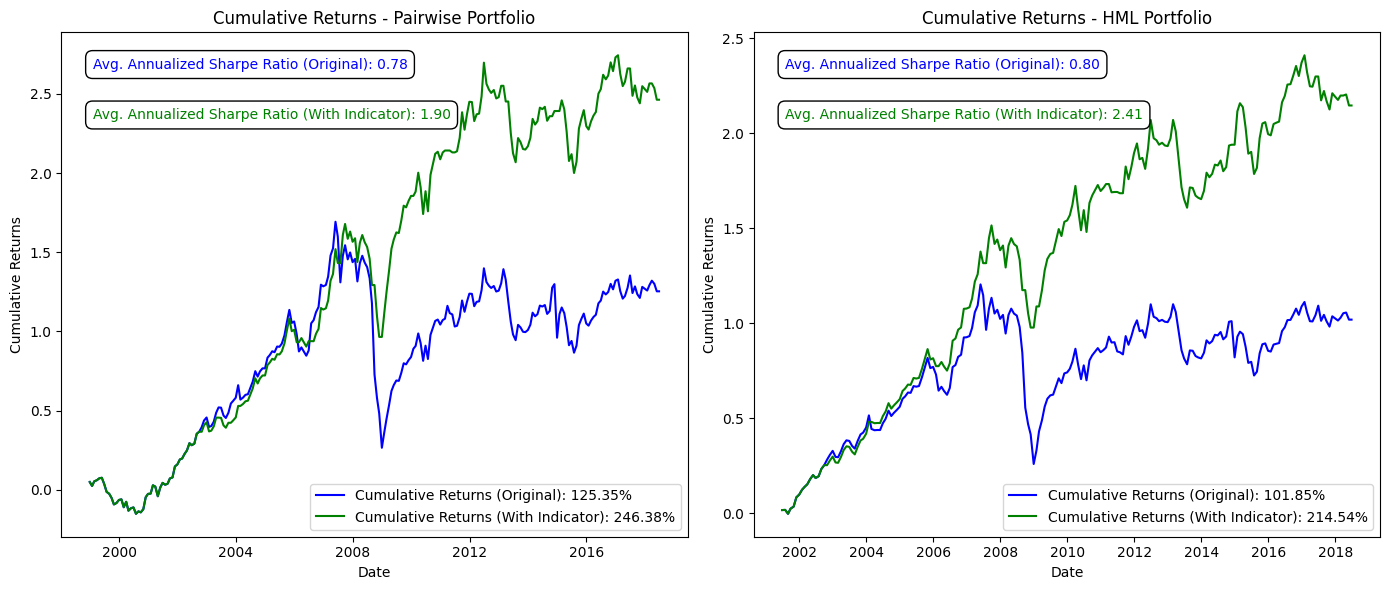

In [1038]:
# Number of years in the dataset (for annualizing ratios)
num_years = 20

# Function to calculate and return cumulative returns, Sharpe ratios, and aligned dates
def calculate_returns_and_sharpe(returns, returns_with_indicator, risk_free_rate, dates):
    # Calculate cumulative returns with and without the indicator
    cumulative_returns_with_indicator = (1 + returns_with_indicator).cumprod() - 1
    cumulative_returns_original = (1 + returns).cumprod() - 1
    
    # Align the dates with the length of cumulative returns
    aligned_dates = dates[-len(cumulative_returns_with_indicator):]
    
    # Align the original cumulative returns to the length of aligned dates
    aligned_cumulative_returns = cumulative_returns_original[-len(aligned_dates):]

    # Calculate the mean and standard deviation of the returns
    mean_return_original = returns.mean()
    std_return_original = returns.std()
    mean_return_with_indicator = returns_with_indicator.mean()
    std_return_with_indicator = returns_with_indicator.std()

    # Calculate Sharpe ratios (monthly)
    sharpe_ratio_original = (mean_return_original - risk_free_rate) / std_return_original 
    sharpe_ratio_with_indicator = (mean_return_with_indicator - risk_free_rate) / std_return_with_indicator

    # Annualize the Sharpe ratios
    annualized_sharpe_ratio_original = (sharpe_ratio_original * np.sqrt(12)) / num_years * 100
    annualized_sharpe_ratio_with_indicator = (sharpe_ratio_with_indicator * np.sqrt(12)) / num_years * 100

    # Calculate cumulative returns at the end of the period
    final_cumulative_return_original = cumulative_returns_original.iloc[-1]
    final_cumulative_return_with_indicator = cumulative_returns_with_indicator.iloc[-1]

    return aligned_dates, aligned_cumulative_returns, cumulative_returns_with_indicator, annualized_sharpe_ratio_original, annualized_sharpe_ratio_with_indicator, final_cumulative_return_original, final_cumulative_return_with_indicator

# Calculate for Pairwise portfolio
aligned_dates_pairwise, aligned_cumulative_pairwise_returns, cumulative_pairwise_returns_with_indicator, sharpe_ratio_original_pairwise, sharpe_ratio_with_indicator_pairwise, final_cumulative_return_original_pairwise, final_cumulative_return_with_indicator_pairwise = calculate_returns_and_sharpe(pairwise_carry_returns, pairwise_carry_returns_with_indicator, risk_free_rate, dates)

# Calculate for HML portfolio
aligned_dates_hml, aligned_cumulative_hml_returns, cumulative_hml_returns_with_indicator, sharpe_ratio_original_hml, sharpe_ratio_with_indicator_hml, final_cumulative_return_original_hml, final_cumulative_return_with_indicator_hml = calculate_returns_and_sharpe(hml_carry_returns, hml_carry_returns_with_indicator, risk_free_rate, dates)

# Plot the results for Pairwise portfolio
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(aligned_dates_pairwise, aligned_cumulative_pairwise_returns, 
         label=f'Cumulative Returns (Original): {final_cumulative_return_original_pairwise:.2%}', color='blue')
plt.plot(aligned_dates_pairwise, cumulative_pairwise_returns_with_indicator, 
         label=f'Cumulative Returns (With Indicator): {final_cumulative_return_with_indicator_pairwise:.2%}', color='green')
plt.title('Cumulative Returns - Pairwise Portfolio')
plt.annotate(f'Avg. Annualized Sharpe Ratio (Original): {sharpe_ratio_original_pairwise:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top', color='blue', 
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.annotate(f'Avg. Annualized Sharpe Ratio (With Indicator): {sharpe_ratio_with_indicator_pairwise:.2f}', 
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, ha='left', va='top', color='green', 
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

# Plot the results for HML portfolio
plt.subplot(1, 2, 2)
plt.plot(aligned_dates_hml, aligned_cumulative_hml_returns, 
         label=f'Cumulative Returns (Original): {final_cumulative_return_original_hml:.2%}', color='blue')
plt.plot(aligned_dates_hml, cumulative_hml_returns_with_indicator, 
         label=f'Cumulative Returns (With Indicator): {final_cumulative_return_with_indicator_hml:.2%}', color='green')
plt.title('Cumulative Returns - HML Portfolio')
plt.annotate(f'Avg. Annualized Sharpe Ratio (Original): {sharpe_ratio_original_hml:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, ha='left', va='top', color='blue', 
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.annotate(f'Avg. Annualized Sharpe Ratio (With Indicator): {sharpe_ratio_with_indicator_hml:.2f}', 
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, ha='left', va='top', color='green', 
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()

plt.tight_layout()
plt.show()



# 4. Conclusion and Summary of Results

This research aimed to enhance the traditional carry trade strategy by incorporating a volatility-based indicator, designed to optimize returns while mitigating risk. The approach involved the development and implementation of a dual-layer indicator that dynamically adjusted the portfolio’s exposure based on forecasted and realized volatility measures.

## Key Findings

1. **GARCH Model Selection:**
   - Through rigorous testing, including the Diebold-Mariano test, the TARCH model emerged as the most effective for both the Pairwise and HML portfolios. This model was particularly adept at capturing the asymmetric nature of volatility in G10 currencies.

2. **Volatility Benchmarks:**
   - The 90th percentile thresholds for both forecasted and realized delta volatility were established as critical benchmarks. These thresholds served as the basis for the indicator, ensuring that the carry trade was deactivated during periods of excessive market turbulence.

3. **Indicator Implementation:**
   - The implementation of the indicator involved recalculating the carry trade returns under the influence of these volatility thresholds. The indicator proved effective in dynamically managing the portfolios, turning the trade on or off depending on current market conditions.

4. **Portfolio Performance:**
   - The analysis revealed significant differences in the performance of the portfolios with and without the indicator:
     - **Cumulative Returns:** The indicator-adjusted portfolios demonstrated a more stable growth trajectory, particularly during periods of heightened volatility, resulting in improved final cumulative returns compared to the original portfolios.
     - **Sharpe Ratios:** The Sharpe ratios, particularly when annualized, showed a marked improvement under the indicator strategy. This indicates that the indicator not only preserved capital during volatile periods but also enhanced the overall risk-adjusted performance of the portfolios.

## Conclusion

The results of this study underscore the value of integrating dynamic volatility management into carry trade strategies. By leveraging advanced GARCH models and setting robust volatility benchmarks, the proposed indicator effectively mitigates risk while optimizing returns. The success of the indicator in enhancing the performance of the Pairwise and HML portfolios suggests that such approaches could be valuable in broader financial applications, particularly in environments characterized by significant volatility.

Future research could extend this framework by exploring different asset classes or incorporating additional macroeconomic variables to further refine the model. Additionally, testing the indicator’s performance across various market conditions and time periods could provide deeper insights into its robustness and applicability.

Overall, the findings contribute to the ongoing development of sophisticated trading strategies that balance the pursuit of returns with the imperative of risk management in increasingly volatile global markets.


# Citations

Meese, R. A., & Rogoff, K. (1983). "Empirical exchange rate models of the seventies: Do they fit out of sample?" Journal of International Economics, 14(1-2), 3-24. https://doi.org/10.1016/0022-1996(83)90017-X

Molodtsova, T., & Papell, D. H. (2014). "Taylor rule exchange rate forecasting during the financial crisis." *Journal of Economics and Finance, 38*(4), 676-690. https://doi.org/10.1007/s12197-014-9302-6

Moosa, I. A., & Burns, K. (2015). "The Meese-Rogoff Puzzle." In Demystifying the Meese-Rogoff Puzzle. Palgrave Pivot, London. 